## Gather data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
import seaborn as sns

In [2]:
data = pd.read_csv("./weight-height.csv")

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.shape

(10000, 3)

Let's assume this is our population data. i.e. we have 10000 population whose height, weight and gender is known to us.

## Population parameters

In [5]:
male_population = data[data['Gender']=='Male']
female_population = data[data['Gender']=='Female']

In [10]:
male_pop_height_mean = male_population['Height'].mean()
male_pop_height_std_dev = male_population['Height'].std(ddof=0)

In [15]:
print(f"For Male heights: Population Mean = {np.round(male_pop_height_mean,2)}, Population std. dev = {np.round(male_pop_height_std_dev,2)}")

For Male heights: Population Mean = 69.03, Population std. dev = 2.86


In [13]:
female_pop_height_mean = female_population['Height'].mean()
female_pop_height_std_dev = female_population['Height'].std(ddof=0)

In [16]:
print(f"For Female heights: Population Mean = {np.round(female_pop_height_mean,2)}, Population std. dev = {np.round(female_pop_height_std_dev,2)}")

For Female heights: Population Mean = 63.71, Population std. dev = 2.7


## Take a sample

Now, suppose I take a small sample (sample size = 200) from the data and observe its property

In [17]:
sample_male_data = male_population.sample(frac=0.04)

In [18]:
sample_male_data

,Gender,Height,Weight
4132,Male,70.447792,199.383453
4736,Male,67.266736,178.634684
4993,Male,65.327337,171.762518
4355,Male,74.040780,217.122686
3630,Male,67.290283,187.001020
...,...,...,...
1732,Male,67.590168,174.009152
2797,Male,71.050918,200.734578
2792,Male,72.467025,208.294589
1739,Male,69.762879,189.828313


## Calculate sample statistics

In [19]:
male_sam_height_mean = sample_male_data['Height'].mean()
male_sam_height_std_dev = sample_male_data['Height'].std(ddof=1)

In [20]:
print(f"For Male heights: sample mean = {np.round(male_sam_height_mean,2)}, sample std dev = {np.round(male_sam_height_std_dev,2)}")

For Male heights: sample mean = 69.18, sample std dev = 2.94


## Take multiple samples of the same population (male height) and observe the sample statistics

In [23]:
population_size = len(male_population)

In [24]:
population_size

5000

In [21]:
no_of_samples = 100
sample_size = 200

In [22]:
male_sample_heights_mean = []
male_sample_heights_std_dev = []

In [25]:
for i in range(no_of_samples):
    sample_data = male_population.sample(frac=sample_size/population_size)
    m = sample_data['Height'].mean()
    s = sample_data['Height'].std(ddof=1)
    male_sample_heights_mean.append(m)
    male_sample_heights_std_dev.append(s)

## Mean of sample means

In [29]:
np.mean(male_sample_heights_mean)

69.02241629252659

In [30]:
male_pop_height_mean

69.02634590621737

## Mean of sample std dev

In [31]:
np.mean(male_sample_heights_std_dev)

2.8763690099163113

In [32]:
male_pop_height_std_dev

2.863075878119542

## Sampling distribution and Central Limit Theorem

By **Sampling Distribution** we mean distribution of "sample means". i.e. If I take multiple samples from the same population and calculate the average for every sample and try to build a distrbution of those calculated sample means then that will create sampling distribution or distribution of sample means.

In [48]:
def sampling_distribution(sample_size=40, no_of_samples=500):
    sample_means = []
    sample_std_devs = []
    for i in range(no_of_samples):
        sample_data = male_population.sample(frac=sample_size/population_size)
        m = sample_data['Height'].mean()
        s = sample_data['Height'].std(ddof=1)
        sample_means.append(m)
        sample_std_devs.append(s)
    print(f"For sample means: average: {np.round(np.mean(sample_means),2)}, minimum: {np.round(min(sample_means), 2)}, maximum: {np.round(max(sample_means),2)}")
    return sample_means, sample_std_devs

In [62]:
s = 200
n = 1000

In [63]:
sam_means, sam_std_devs = sampling_distribution(sample_size=s, no_of_samples=n)

For sample means: average: 69.01, minimum: 68.29, maximum: 69.62


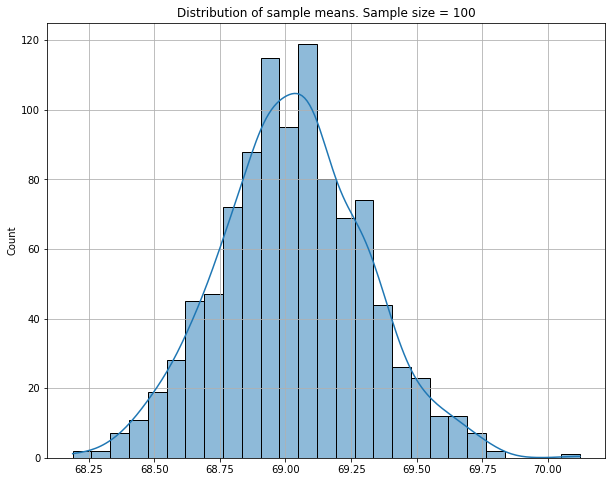

In [61]:
plt.figure(figsize=(10,8))
sns.histplot(data=sam_means, kde=True)
plt.grid()
plt.title(f"Distribution of sample means. Sample size = {s}")
plt.show()

**Sample Mean Statistics**

| Sample Size | Average of Sample Means | Lower Limit | Upper Limit |
| :---------: | :---------------------: | :---------: | :---------: |
| 25 | 69.02 | 67.22 | 70.58 |
| 30 | 69.01 | 67.08 | 70.72 |
| 40 | 69.03 | 67.53 | 70.42 |
| 50 | 69.05 | 67.78 | 70.36 |
| 100 | 69.03 | 68.19 | 70.12 |
| 200 | 69.01 | 68.29 | 69.62 |

In [65]:
np.round(male_pop_height_mean,2)

69.03

**Observations**

1. Average of the sample means (for any sample size) is very close or exactly equal to the population mean
2. As the sample size increases the range of the distribution (max - min) decreases
3. For all the cases the sample distribution follow a normal distribustion (Gaussian distribution) 